<h1><center>When Your Ethnicity is the Face of a Pandemic</center></h1>
<h3><center>Analyzing the Racism-Fueled Media Messages Brought About by the COVID-19 Pandemic</center></h3>
<center>Christy Qiu | May 10, 2020<center>

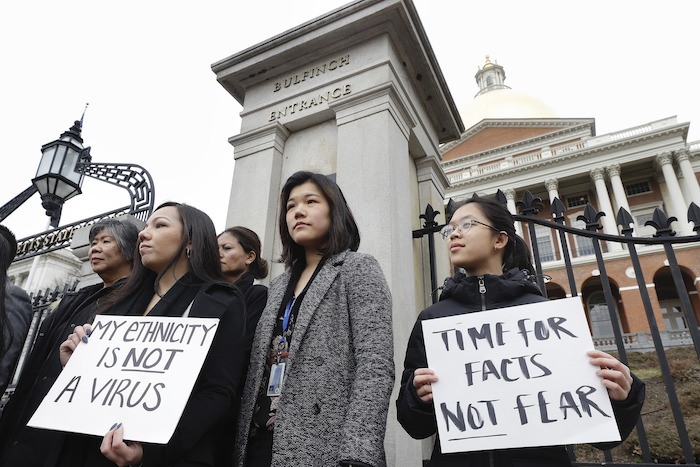

<center>“Fucking Asians, motherfuckers. You brought this disease here.”</center>
<center>"You're infected China boy, you need to get off the train."</center>
<center>“You caused coronavirus, bitch.”</center>
<center>“Get out of our country.”</center>
<center>“Go back to China"</center>
<center>“Chinese fuck”</center>
<center>“Chink.”</center>

Asian Americans across the U.S. have been the recipients of such hateful speech. They've report being spit on, yelled at, even threatened in the streets. In March, a man in Texas stabbed and cut a Burmese-American family, including two young children, in an attack that the F.B.I. has called a hate crime. In April, Asian Americans and Pacific Islanders across the United States reported more than 1,500 incidents of racism and discrimination related to COVID-19. In my own hometown of Pasadena, CA, a movie poster for Mulan was defaced with graffiti that depicted a mask over the titular character’s face and the message “Toxic made in Wuhan.”

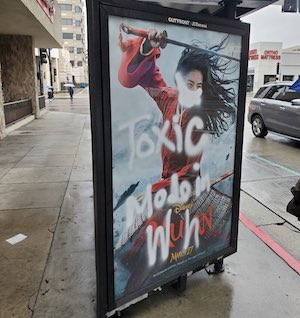

Being of Asian descent, my family has also endured anti-Asian attacks. Trips to grocery stores are filled with glares and muttered expletives from fellow customers. Last month, my father's small business has been the target of a multiple hate crimes, including vandalism and an attempted robbery. Personally affected by this issue and aware of how important it is, I decided to investigate several aspects of the media messages, specifically Tweets and news articles, regarding the issue.

## Important Functions

In [1]:
%run functions.ipynb
%matplotlib inline

In [29]:
%run required.ipynb

In [3]:
import tweepy
import configparser
import os
import json
import GetOldTweets3 as got
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import csv
import math

from collections import Counter

## Collecting the Data

### <i>Tweets</i>

I collected Twitter Tweets using the Tweepy API. Tweets were collected by month and over time, by user (@realDonaldTrump and @SecPompeo) and by keywords.

For the tweets collected by month and over time (all_time), the specific search query for each Tweet was:
- "asian american" OR "asian-american" OR #asianamerican AND racism OR racist OR xenophobia OR #racism OR #racist OR #xenophobia AND coronavirus OR "corona virus" OR covid19 OR covid-19 OR pandemic OR virus OR "chinese virus" OR "china virus" OR #coronavirus OR #covid19 OR #pandemic OR #chinavirus OR #chinesevirus']

For the tweets collected by keyword (racist_tweets), the specific search query for each Tweet was:
- "ching chong" OR chink OR chingchong AND "kung flu" OR "kung fu flu" OR "ching chong virus"
    - ching chong and chink are perjorative terms and racial slurs used to mock the Chinese language
    - kung fu flu, kung flu, and ching chong virus are offensive labellings of COVID-19, similar to Chinese Virus and Wuhan Virus

For @realDonaldTrump's tweets, the specific search query for each Tweet was:
- "Chinese Virus"

For @SecPompeo's tweets, the specific search query for each Tweet was:
- "Wuhan Virus"

In [4]:
jan_tweets = load_tweets('data/1/tweets_2020-01-01_to_2020-02-01.json')
feb_tweets = load_tweets('data/2/tweets_2020-02-01_to_2020-03-01.json')
mar_tweets = load_tweets('data/3/tweets_2020-03-01_to_2020-04-01.json')
apr_tweets = load_tweets('data/4/tweets_2020-04-01_to_2020-05-01.json')
all_time = load_tweets('data/all_time/tweets_2020-01-01_to_2020-05-01.json')
trump_tweets = load_tweets('data/all_time/realdonaldtrump_2020-01-01_to_2020-05-01.json')
pompeo_tweets = load_tweets('data/all_time/secpompeo_2020-01-01_to_2020-05-01.json')
racist_tweets = load_tweets('data/all_time/racist_tweets_2020-01-01_to_2020-05-01.json')

### <i>Articles</i>

I collected news articles by month using Lexis Nexis, searching the query string, (coronavirus OR covid19 OR pandemic) AND (asian american AND racism). \
Sources included:
- The Los Angeles Times
- The New York Times
- Washington Post Blogs
- The Independent (United Kingdom)
- The Guardian (London)
- South China Morning Post

In [5]:
corpus1 = json.load(open('data/corpus_index1.json'))
corpus2 = json.load(open('data/corpus_index2.json'))
corpus3 = json.load(open('data/corpus_index3.json'))
corpus4 = json.load(open('data/corpus_index4.json'))

### <i>Describing the Data</i>

**Tweets**

I collected:
- 7 tweets in January
- 138 tweets in February
- 1702 tweets in March
- 2962 tweets in April
- 3100 tweets from January through April
- 8 tweets by Trump
- 8 tweets by Pompeo
- 1840 tweets with the keywords

In [6]:
print("From January through April, there is a total of", len(all_t_tokens), "tokens")

From January through April, there is a total of 45366 tokens


**Articles**

I collected:
- 8 articles from January
- 124 articles from February
- 611 articles from March
- 615 articles from April

In [7]:
print("From January through April, there is a total of", len(all_tokens), "tokens")

From January through April, there is a total of 1709426 tokens


## Let the Analysis Begin

Table of Contents
- How has the discussion evolved over time?
- Has Donald Trump fueled the growth of racism-related messages?
- How has the discussion of Trump fueled further discussion? 
- Do aspects of racism-related tweets correlate with those of racism-related articles?
- How do tweets with racist terms add a new angle to the previously analyzed tweets?

### <i>How has the discussion evolved over time?</i>

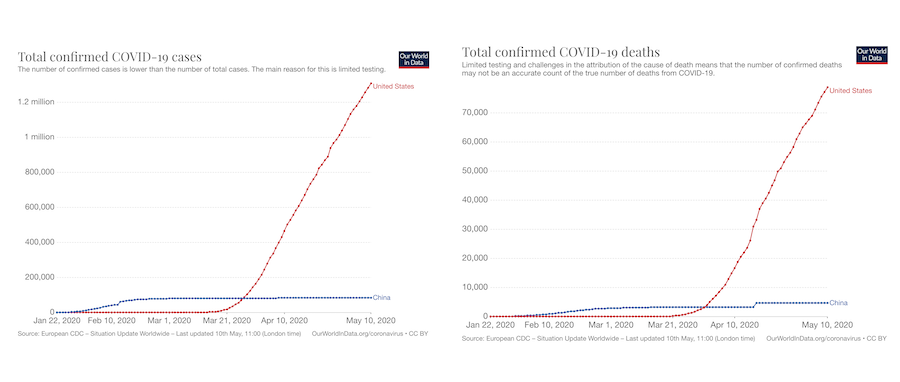

The first confirmed cases of COVID-19 in the U.S. occured on January 20th. On February 29th, the U.S. reported its first coronavirus-related death. On March 13, President Trump declared a national emergency. There are now over 1,300,000 confirmed cases and nearly 80,000 deaths.

The COVID-19 pandemic has evolved right in front of our eyes. Certainly, the media discussion regarding racism towards Asian Americans has evolved as well. Let's exam how.

#### Tweet Bigram and Trigram Anlaysis

*note: the January tweet sample is too small (7 tweets) to make sound conclusions

In [8]:
feb_bitrigram

,Bigram,Trigram
Rank,,
1,asian american,asian american lawmakers
2,american lawmakers,american lawmakers urge
3,the coronavirus,lawmakers urge congress
4,congress members,urge congress members
5,to help,congress members to
6,help stop,members to help
7,lawmakers urge,to help stop
8,urge congress,help stop coronavirusfueled
9,members to,stop coronavirusfueled xenophobia


In [9]:
mar_bitrigram

,Bigram,Trigram
Rank,,
1,asian american,the chinese virus
2,chinese virus,the asian american
3,the chinese,an asian american
4,the coronavirus,asian american community
5,of the,asian american and
6,the asian,it the chinese
7,an asian,calling it the
8,the virus,as an asian
9,in the,our asian american


In [10]:
apr_bitrigram

,Bigram,Trigram
Rank,,
1,asian american,an asian american
2,an asian,asian american family
3,american family,fears made him
4,made him,made him stab
5,coronavirus fears,him stab an
6,him stab,says coronavirus fears
7,fears made,coronavirus fears made
8,stab an,stab an asian
9,racist says,family as they


What do these bigrams and trigrams reveal?
- In the beginning, the Twitter discussion focused on lawmakers and congress and stopping coronavirus-fueled xenophobia
- A new phrase appeared in March — "Chinese Virus" — and the diction and mood shifted into with the growth of the use of the word "community"
- In April, the mood shifted once again with the discussion of a stabbing (presumably, the Texas stabbing) and the use of the phrases "coronavirus fears"

#### Keyword Analysis

The Twitter keywords were selected from the 50 most common tokens across all tweets, excluding stopwords and the query searches (the query searchwords are in every tweet, so they would skew the results). The article keywords were selected in the same manner.

Tweet Keyword Frequency by Month


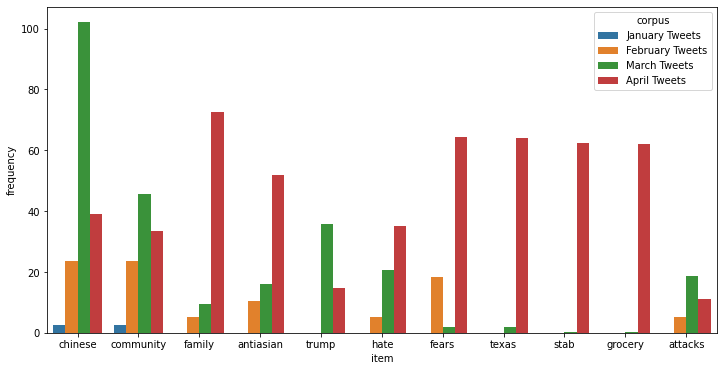

In [11]:
comparison_data = compare_items(jan_t_word_dist, feb_t_word_dist,mar_t_word_dist,apr_t_word_dist,['chinese', 'community', 'family', 'antiasian', 'trump', 'hate', 'fears', 'texas', 'stab', 'grocery', 'attacks'])
print('Tweet Keyword Frequency by Month')
comparison_plot(comparison_data, label1= "January Tweets", label2= "February Tweets", label3= "March Tweets", label4= "April Tweets")

Article Keyword Frequency by Month


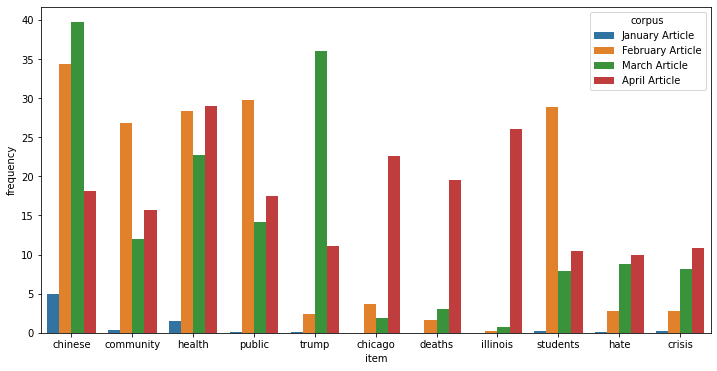

In [12]:
comparison_data = compare_items(jan_word_dist, feb_word_dist,mar_word_dist,apr_word_dist,['chinese', 'community', 'health', 'public', 'trump', 'chicago', 'deaths', 'illinois', 'students', 'hate', 'crisis'])
print('Article Keyword Frequency by Month')
comparison_plot(comparison_data, label1= "January Article", label2= "February Article", label3= "March Article", label4= "April Article")

Key findings:
- In both tweets and articles, "chinese" was used most often in March — which also collides with the timeframe President Donald Trump began tweeting about coronavirus as the "Chinese Virus." Unsurprisingly, the word "trump" was also used most frequently in March.
- In the tweets, "fears," "texas," "stab," and "grocery" have significantly higher frequencies in April than any other month. This is presumably due to the Texas stabbing, which occured in a grocery store.
- "Community" has a relatively even distribution among the months.
- Specific locations, such as Chicago and Illinois, are mentioned more often in articles than tweets, and "chicago" and "illinois" appear most frequently in April than any other month.
- The distribution of the frequency of "Hate" in tweets follows that of the frequency in articles, which features increasing frequency with each month.

#### Keyness Analysis

In [13]:
print("{: <20}{: <8}{:}\t\t{: <10}{:}\t{:}".format('word', 'old', 'norm_old', 'recent', 'norm_recent', 'LL'))
print("="*80)

row_template = "{: <20}{: <8}{:0.2f}\t\t{: <10}{:0.2f}\t{: 0.2f}"

for word, freq in top_old:
    old = freq
    recent = stripped_recenttweets_wfreq.get(word,0)
    norm_old = old/old_size * 1000
    norm_recent = recent/recent_size * 1000

    LL = 0 if recent==0 else log_likelihood(old, old_size, recent, recent_size)
    print(row_template.format(word, old, norm_old, recent, norm_recent, LL))

word                old     norm_old		recent    norm_recent	LL
stop                34      17.88		211       4.95	 35.47
lawmakers           31      16.30		25        0.59	 120.66
help                25      13.14		78        1.83	 50.28
members             22      11.57		56        1.31	 50.80
congress            19      9.99		39        0.92	 49.84
spread              18      9.46		86        2.02	 25.17
urge                16      8.41		22        0.52	 51.08
coronavirusfueled   16      8.41		17        0.40	 56.65
rumors              16      8.41		4         0.09	 81.22
people              14      7.36		422       9.91	-1.31
via                 13      6.83		172       4.04	 2.89
denounce            11      5.78		42        0.99	 18.89
outbreak            11      5.78		85        2.00	 8.43
party               11      5.78		13        0.31	 37.39
way                 10      5.26		55        1.29	 12.04
community           10      5.26		379       8.90	-3.20
like                10      5.26		209   

### <i>Has Donald Trump fueled the growth of racism-related messages?</i>

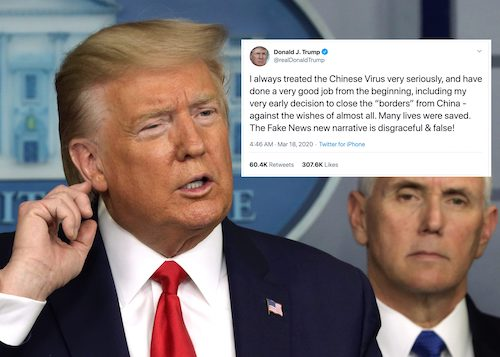

Even after the CDC had warned against naming diseases after locations, saying it stigmatizes residents, Trump repeatedly used the phrase "Chinese Virus" in 8 tweets posted between March 16 and March 23 Similarily, in a series of 8 tweets, Secretary of State Mike Pompeo began using the phrase "Wuhan Virus" on March 13 and continued using it until March 25. Several other officials, including GOP lawmakers, have also referred to the virus as the “Chinese virus” or “Wuhan virus” while addressing its outbreak domestically and abroad.

([<matplotlib.axis.XTick at 0x7f44b779c080>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

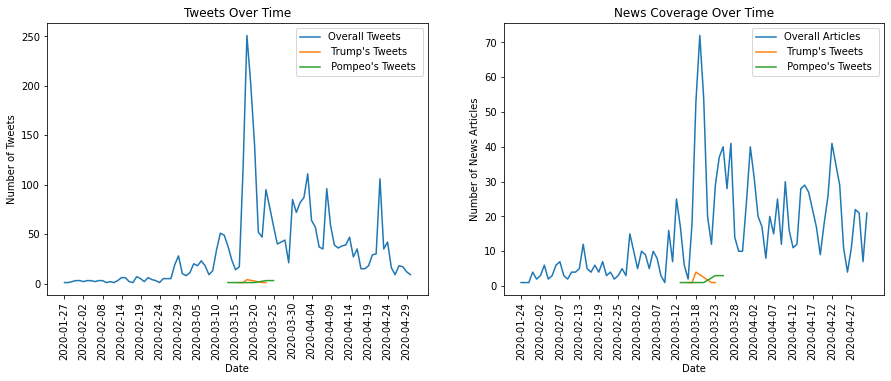

In [14]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Tweets Over Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Tweets")
plt.plot('date', 'count', data=dftweets, label='Overall Tweets')
plt.plot('date', 'count', data=dftrump, label=' Trump\'s Tweets ')
plt.plot('date', 'count', data=dfpompeo, label=' Pompeo\'s Tweets ')
plt.legend()
plt.xticks(dftweets["date"][::5], rotation = 90)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("News Coverage Over Time")
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of News Articles")
plt.plot('date', 'count', data=dflexis, label='Overall Articles')
plt.plot('date', 'count', data=dftrump, label=' Trump\'s Tweets ')
plt.plot('date', 'count', data=dfpompeo, label=' Pompeo\'s Tweets ')
plt.legend()
plt.xticks(dflexis["date"][::5], rotation = 90)

([<matplotlib.axis.XTick at 0x7f44b763a4a8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

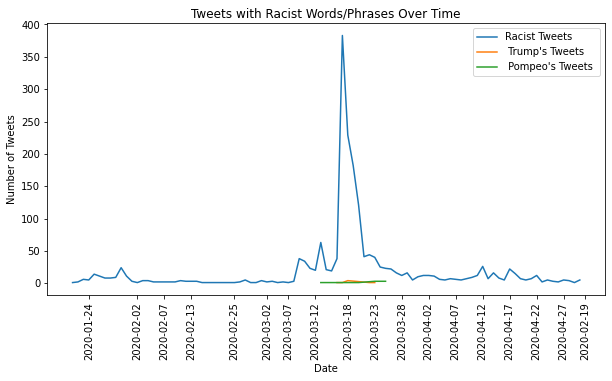

In [15]:
fig = plt.figure(figsize = (10,5))

ax2 = fig.add_subplot(1, 1, 1)
ax2.set_title("Tweets with Racist Words/Phrases Over Time")
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Tweets")
plt.plot('date', 'count', data=dfracist_tweets, label='Racist Tweets')
plt.plot('date', 'count', data=dftrump, label=' Trump\'s Tweets ')
plt.plot('date', 'count', data=dfpompeo, label=' Pompeo\'s Tweets ')
plt.legend()
plt.xticks(dflexis["date"][::5], rotation = 90)

These graphs reveal immense spikes in the number of tweets during the time period Trump and Pompeo used the phrases "Chinese Virus" and "Wuhan Virus." These government officials have certainly fueled the proliferation of racism-related tweets.

### <i> How has the discussion of Trump fuel further discussion? <i>

To see how, I'm dividing the tweets based on the number of replies. Those with no replies will classify as silent tweets white those with one of more replies will be considered discussion creators.

#### KWIC Concordances: Silent Tweets vs. Discussion Creators


In [16]:
stripped_silent_wfreq.most_common(20)

[('chinese', 454),
 ('family', 260),
 ('people', 257),
 ('community', 253),
 ('im', 230),
 ('says', 230),
 ('fears', 216),
 ('made', 215),
 ('texas', 211),
 ('antiasian', 207),
 ('china', 201),
 ('stab', 199),
 ('grocery', 198),
 ('shopped', 195),
 ('us', 184),
 ('calling', 182),
 ('stop', 179),
 ('americans', 178),
 ('hate', 177),
 ('trump', 165)]

In [17]:
stripped_discussion_wfreq.most_common(10)

[('chinese', 281),
 ('people', 179),
 ('community', 136),
 ('calling', 124),
 ('china', 98),
 ('trump', 93),
 ('im', 87),
 ('like', 74),
 ('americans', 70),
 ('antiasian', 68)]

In [18]:
silent_kwic = make_kwic('trump', raw_silent_tokens, win=5)
silent_kwic_sample = random.sample(silent_kwic,20)
print_kwic(sort_kwic(silent_kwic_sample,['R1']))

                  racist rhetoric supported by the  trump  administration. asian american feminist blog
                        rise from covid19, we have  trump  and his administration perpetuating hate
                  now @lanacondor how is president  trump  being "racist" by referring to
              @cbsnews unhinged msnbc analyst says  trump  calling the coronavirus 'chinese' puts
                   see anything racist in presiden  trump  calling it chinese virus. i
as they grocery shopped https://www.dailykos.com/story/2020/4/2/1933698/-texas-racist-says-coronavirus-fears-made-him-stab-an-asian-american-family-as-they-grocery-shopped  trump  calls covid19 "the chinese virus"
          ‘kung-flu’ to asian-american reporter as  trump  defends ‘chinese flu’ https://www.nydailynews.com/coronavirus/ny-coronavirus-kung-flu-white-house-weijia-jiang-cbs-20200317-etnt6uhoojharhykdsblkn7dta-story.html well
                     month he called out president  trump  for "empowering" racis

In [19]:
discussion_kwic = make_kwic('trump', raw_discussion_tokens, win=5)
discussion_kwic_sample = random.sample(discussion_kwic,20)
print_kwic(sort_kwic(discussion_kwic_sample,['R1']))

              asian-american would be upset" about  trump  &amp; rwnjs using term #chinesevirus.
                         its in your culture. also  trump  calling covid-19, the “chinese virus”
                   not technical reasons that make  trump  calling covid-19 “#chinesevirus” wrong. it’s
attacks - sf chronicle https://www.sfchronicle.com/bayarea/article/coronavirus-asian-american-groups-compile-hate-15144295.php  trump  calling coronavirus ‘chinese virus’ encourages
                         can't stop the racism. by  trump  calling it the chinese virus,
                        actual threat to us. after  trump  calls it china virus, overnight
                           feel about all of this.  trump  claims asian americans "agree with
                        #racism 1) your support of  trump  cost us 6 weeks of
         "it's incredibly upsetting that president  trump  couldn't describe #covid19 appropriately...there are
                   has rebuked us president donald  trum

The KWIC concordance for silent tweets differs from that of discussion creators in the following ways:
- There are 7 tweets (lines 6, 7, 8, 9, 13, 14, 15) from the discussion creators talking about how trump has called COVID-19 the Chinese Virus, but there are 0 in the silent tweets
    - This was a highly controversial issue, so by tweeting about it, the discussion creators were able to receive replies
- For 5 tweets from the discussion creators, "trump" is followed by "and" (including &amp;) but there are 0 in the silent tweets
    - People are more promted to reply to a tweet that puts Trump in relation with something else
- For 3 silent tweets (lines 6, 14, 15), "trump" is followed by "said" or "has said" but none of the tweets from the discussion creators have this structure
    - People are less likely to respond to factual tweets

### <i>Do aspects of racism-related tweets correlate with those of racism-related articles? </i>

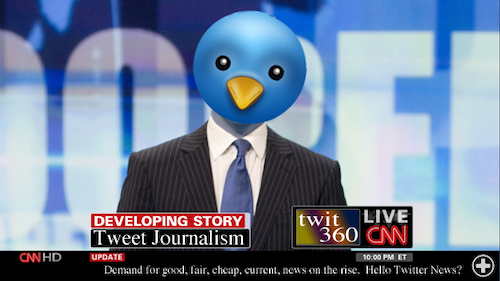

In the current digital age, Twitter can be seen as another medium of journalism. Similar to a "most-read" column of a news site, Twitter has the "trending" section. Tweets contain first-hand stories on the most important and timely of issues. But, does the Twitter agenda align with that of journalism? With regards to anti-Asian sentiment during the COVID-19 pandemic, can we expect news sites to report on the issues that are already being discussed on Twitter?

Let's examine these questions with word frequencies, collocation analyses, and sentiment analyses.

#### Comparing word frequencies

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


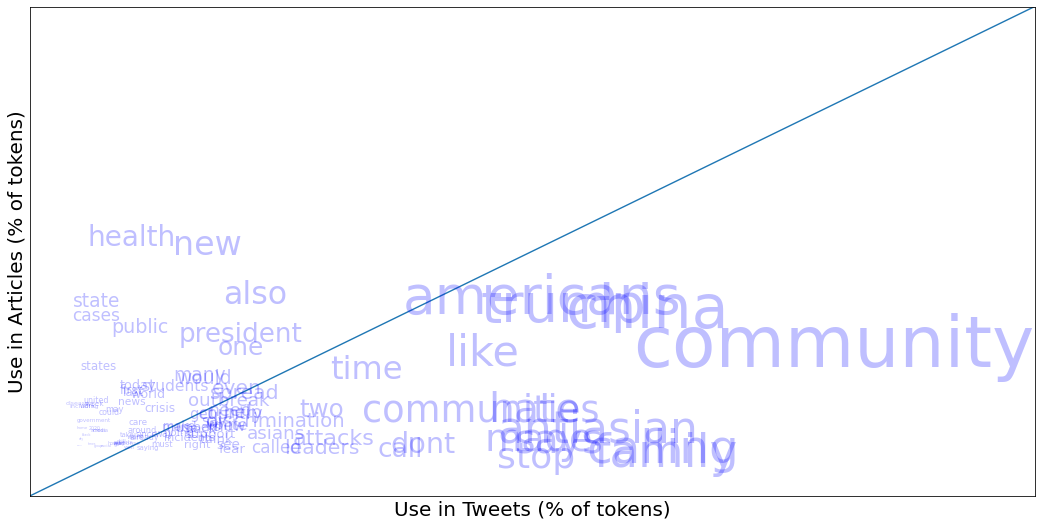

In [20]:
plot_shared_vocab(cdf[np.logical_and(cdf['Tweets_percent']>0.05, cdf['Articles_percent']>0.05)])

#### Collocation Analysis

As seen in the graph above, "community" made up the largest percentage of Tweets while "health" made up the largest percentage of articles. How do the use of these words compare and contrast between the two mediums? Why are they more frequent in one medium than the other?

The following collocates are derived from tokens that exclude from stopwords and query searches.

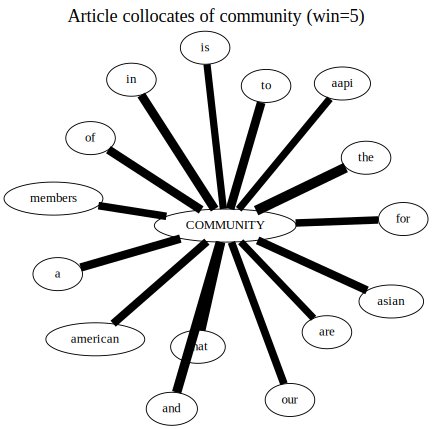

In [21]:
plot_collocates('community', article_community_colls, num=15, threshold=2,
                title='Article collocates of community (win=5)')

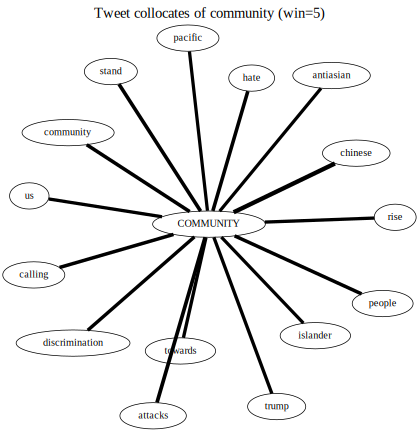

In [22]:
plot_collocates('community', tweet_community_colls, num=15, threshold=2,
                title='Tweet collocates of community (win=5)')

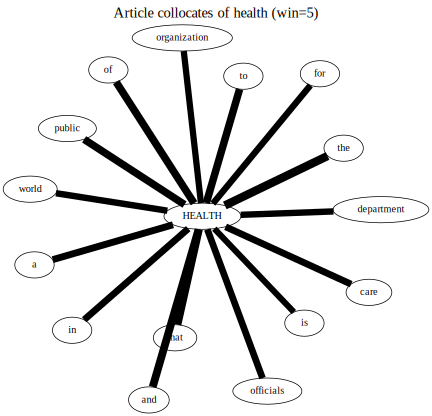

In [23]:
plot_collocates('health', article_health_colls, num=15, threshold=2,
                title='Article collocates of health (win=5)')

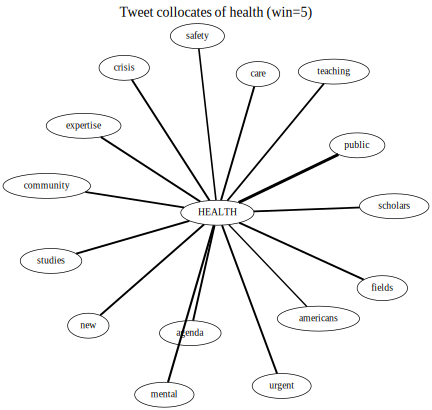

In [24]:
plot_collocates('health', tweet_health_colls, num=15, threshold=2,
                title='Tweet collocates of health (win=5)')

Key findings:
- Within news articles, “community” is used in a broader sense. It addresses students, leaders, AAPI (Asian American Pacific Islanders), staff, and more. Within tweets, “community” is used more with regard to race and racism with words, such as “attacks,” “hate,” “discrimination,” and “antiasian,” as collocates.
- In both articles and tweets, "community" is attached to words like "us" and "people," lending the word a sense of empathy.
- “Health” is used similarly in tweets and articles. “Mental,” “public,” and “care” are all collocates. 
- In articles, health is often used alongside locations, inferred by the use of “Illinois,” “world,” “state,” and “county.” Within tweets, “health” is used with words like “crisis” and “urgent,” emphasizing the seriousness of the current state of health.

#### Setiment Analysis

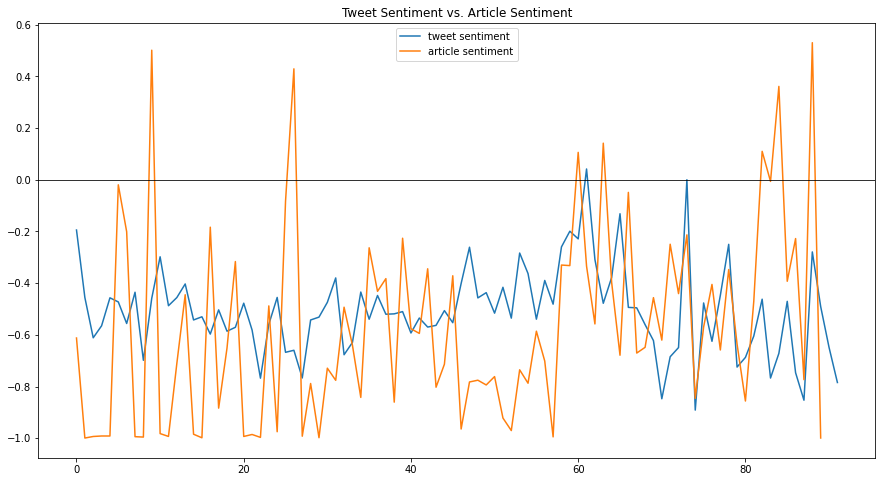

In [30]:
plt.rcParams["figure.figsize"] = (15,8)
ax = t.plot(label="tweets")
a.plot(ax=ax, label = 'articles')
plt.title('Tweet Sentiment vs. Article Sentiment')
plt.gca().legend(('tweet sentiment','article sentiment'))
ax.axhline(y=0, xmin=0.0, xmax=1.0, color='black', linewidth=0.8)

The movement of tweet sentiment and article sentiment slightly model one another, with articles having larger fluctuations and more positive sentiment. Tweet sentiment has been negative nearly the entire time.

### <i>How do tweets with racist terms add a new angle to the previously analyzed tweets?</i>

In [31]:
s_racist_trigrams_dist.most_common(10)

[('virus chinese virus', 41),
 ('chinese wuhan flu', 30),
 ('virus virus virus', 30),
 ('virus wuhan virus', 30),
 ('chinese virus virus', 23),
 ('flu foo man', 22),
 ('foo man achoo', 22),
 ('man achoo chinavirus', 21),
 ('riceafluie fluinease flu', 21),
 ('achoo chinavirus chinkachoo', 20)]

Interestingly, the trigrams revealed that, asides from Kung Fu Flu, Kung Flu, Ching Chong Virus, China Virus, and Chinese Virus, COVID-19 has also been called riceafluie fluinease flu and achoo chinavirus chinkachoo. 

In [32]:
racist_tweets_wfreq.most_common(25)

[('virus', 1992),
 ('flu', 626),
 ('chinese', 284),
 ('call', 242),
 ('china', 235),
 ('wuhan', 198),
 ('racist', 194),
 ('calling', 179),
 ('like', 138),
 ('people', 128),
 ('called', 127),
 ('dont', 110),
 ('im', 90),
 ('get', 88),
 ('would', 72),
 ('thats', 63),
 ('name', 63),
 ('say', 60),
 ('one', 56),
 ('think', 56),
 ('trump', 55),
 ('funny', 52),
 ('right', 50),
 ('want', 44),
 ('asian', 44)]

It's interesting to me how "funny" is in the top 25 most common words. Let's investigate why this might be.

In [33]:
racist_kwic = make_kwic('funny', raw_racist_tokens, win=6)
print_kwic(sort_kwic(racist_kwic,['R1']))

                         Ching Chong virus. Hahaha now thats  funny  ...YO Terrence can I borrow a
                                virus is racist and not even  funny  I prefer the ching chong virus
                             I love Ching Chong virus!!! Too  funny  I thought it was funny and
                               Ching Chong virus is not even  funny  I see the biggest house n*groe,
                               am okay with "Kung Flu". It's  funny  and no one is belittling Asians
                                  Too funny I thought it was  funny  and I laughed. Not too much
                            ching chong virus. Racism can be  funny  as hell cause the racist jokes
                              to it though. Okay that’s just  funny  as hell! The Ching Chong virus!
                                       is a good name. It is  funny  asf in a time where we
                            Chong virus” and that shit isn’t  funny  at all to me, it’s embarrassing
            

The KWIC concordances reveal a new angle on this labelling of the virus. I found that many of the tweets were about one of Comedian Terrence Williams' tweets:

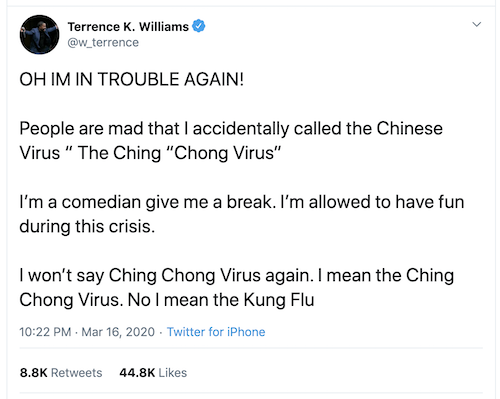

Some of the tweets from those against the use of "Ching Chong Virus" and similar labellings:
- ...Ching Chong virus is not even  funny  I see the biggest house n*groe,...
- ...Chong virus” and that shit isn’t  funny  at all to me, it’s embarrassing...
- ... wordplay, ching chong virus is not  funny  because "ching chong" it's widely used...
- ...and finding "ching chong virus" jokes  funny  is really not something you should...
- ...growing up. Yeah, I bet it's  funny  to ignorant people that don't think...
- ... "the ching chong virus" isn't very  funny  to me :/ The Chinese Virus...

Some of the tweets from those in support:
- ...Ching chong virus!!!! That is some  funny  shit Terrence. Don’t worry, we real...
- ...ching chong virus. Racism can be funny as hell cause the racist jokes...
- ...I love Ching Chong virus!!! Too funny I thought it was funny and...
- ...virus that is! Kung flu is funny because it's a wordplay, ching chong...
- ... as it was sinking! Now that's  funny  in a subtle way! "ching chong...

## Key Takeaways

Anlayzing Twitter tweets and articles revealed a lot of insight into the discussion on racism towards Asian Americans during the COVID-19 pandemic. One of the most insightful findings from this analysis and the most relevant stems from the theory of observational learning, or learning that occurs through observing the behavior of others. 

As President Trump and other officials began calling COVID-19 other names, such as the China Virus, Chinese Virus, and Wuhan Virus, they signified that such labelling was appropriate, leading others to model their behavior. However, this labelling reinforces the misconception that the virus targets those of Chinese descent. To the Americans who would not know better, this misconception can cause them to discriminate those who appear to be of Chinese descent and believe that their actions are justified. Thus, we see in the tweets that a surge in racism-related tweets and tweets with racist phrases and words correlated with the timeframe of Trump and Pompeo had tweeted using their labellings of COVID-19.

An uplifting finding is the frequency of the word "community" in both articles and tweets. While the word is used differently in the two mediums, collocation analysis suggests that in both occurrences, the use suggests that although the Asian American community has been deeply hurt by the racism brough about by COVID-19, they have also banded together tightly as a community.

## Concluding Thoughts

This wave of anti-Asian sentiment comes at a time when Asian Americans have made great strides in terms of representation within the United States. The pride of being an Asian American grew within me as Asian Americans across the country made great achievements in various industries, from politics to entertainment. Such recent achievements include:
- *Crazy Rich Asians* became the first film by a major Hollywood studio to feature a majority cast of Asian descent in a modern setting since *The Joy Luck Club* in 1993.
- Andrew Yang made history as the first Asian American man to run for president as a Democrat.
- *Parasite* made history by becoming the first Asian film to claim the original screenplay Oscar, the first non-English language film to win the award for Best Picture, and the first film from South Korea to be nominated for the Foreign Language Filmcategory.
- Simu Liu will be Marvel’s first Asian superhero in Shang-Chi and the Legend of the Ten Rings. The upcoming film marks Marvel’s first feature with an Asian lead.

This month—May—marks the start of Asian and Pacific Islander American Heritage Month, a time to recognize the contributions and influence of Asian Americans and Pacific Islander Americans to the history, culture, and achievements of the U.S. This year's Asian and Pacific Islander American Heritage Month, unlike any other, may consist of individuals experiencing violence and harassment and others fearing that they'll be the next targets. However, this year's Asian and Pacific Islander American Heritage Month will be one-of-a-kind as the Asian American community bands together to resist racism.

## <center>Thanks for reading!</center>